# Week5 Crawling Assignment

* 네이버 증권 [국내증시 시가총액 페이지](https://finance.naver.com/sise/sise_market_sum.nhn)에 있는 기업 리스트를 읽어옵니다. 
    이 리스트에서 크게 1) 기업명, 2) 링크를 읽어오면 됩니다.
* 위의 2) 링크를 통해 기업의 상세 컨텐츠에 접근할 수 있으며, 이 상세 컨텐츠의 투자정보를 읽어오면 됩니다.

In [8]:
import requests
from bs4 import BeautifulSoup

## 1. 기업 리스트 수집

**실습 1. get_finance_list() 작성**
- Case1-2까지의 코드

In [20]:
def get_finance_list(html):
    
    soup = BeautifulSoup(html)
    
    elements = soup.select('.box_type_l tbody tr')
    
    finance_list = []
    for element in elements:
        link_element = element.select_one('a')
        
        if link_element:
            finance_list.append(link_element)
        
    return finance_list

### Unit Tests

**Case 1-1** - 시가총액 페이지에 아무런 기업이 없을 경우

In [21]:
html = """
<div class="box_type_l">
    <table>
        <tbody>
        </tbody>
    </table>
</div>
"""

finance_list = get_finance_list(html)

assert len(finance_list) == 0

**Case 1-2** - 시가총액 페이지에 기업이 한 개 있을 경우

In [22]:
html = """
<div class="box_type_l">
    <table>
        <tbody>
            <tr>
            </tr>
            <tr>
                <td>
                    <a href="/item/main.nhn?code=000001" class="tltle"></a>
                </td>
            </tr>
        </tbody>
    </table>
</div>
"""

finance_list = get_finance_list(html)

assert len(finance_list) == 1

**Case 1-3** - 시가총액 페이지에 기업이 두 개 있을 경우

In [8]:
html = """
<div class="box_type_l">
    <table>
        <tbody>
            <tr>
            </tr>
            <tr>
                <td>
                    <a href="/item/main.nhn?code=000001" class="tltle"></a>
                </td>
            </tr>
            <tr>
                <td>
                    <a href="/item/main.nhn?code=000002" class="tltle"></a>
                </td>
            </tr>
        </tbody>
    </table>
</div>
"""

finance_list = get_finance_list(html)

assert len(finance_list) == 2

**Case 1-4** - 한 개의 기업이 있는 시가총액 페이지 에서 기업 이름을 가져오기

In [9]:
html = """
<div class="box_type_l">
    <table>
        <tbody>
            <tr>
            </tr>
            <tr>
                <td>
                    <a href="/item/main.nhn?code=000001" class="tltle">첫 번째 기업</a>
                </td>
            </tr>
        </tbody>
    </table>
</div>
"""

finance_list = get_finance_list(html)

assert len(finance_list) == 1

first_finance = finance_list[0]

assert first_finance['title'] == "첫 번째 기업"

**Case 1-5** - 한 개의 기업이 있는 시가총액 페이지 에서 기업 이름과 링크를 가져오기

In [10]:
html = """
<div class="box_type_l">
    <table>
        <tbody>
            <tr>
            </tr>
            <tr>
                <td>
                    <a href="/item/main1.nhn" class="tltle">첫 번째 기업</a>
                </td>
            </tr>
        </tbody>
    </table>
</div>
"""

finance_list = get_finance_list(html)
 
assert len(finance_list) == 1

first_finance = finance_list[0]

assert first_finance['title'] == "첫 번째 기업"
assert first_finance['url'] == "https://finance.naver.com/item/main1.nhn"

**Case 1-6** - 두 개의 기업이 있는 시가총액 페이지 에서 기업 이름과 링크를 가져오기

In [11]:
html = """
<div class="box_type_l">
    <table>
        <tbody>
            <tr>
            </tr>
            <tr>
                <td>
                    <a href="/item/main1.nhn" class="tltle">첫 번째 기업</a>
                </td>
            </tr>
            <tr>
                <td>
                    <a href="/item/main2.nhn" class="tltle">두 번째 기업</a>
                </td>
            </tr>
        </tbody>
    </table>
</div>
"""

finance_list = get_finance_list(html)

assert len(finance_list) == 2

first_finance = finance_list[0]

assert first_finance['title'] == "첫 번째 기업"
assert first_finance['url'] == "https://finance.naver.com/item/main1.nhn"

first_finance = finance_list[1]

assert first_finance['title'] == "두 번째 기업"
assert first_finance['url'] == "https://finance.naver.com/item/main2.nhn"

**Case 1-7** - 실제 네이버 증권 시가총액 한 페이지를 크롤링하기

아래 코드를 실행시켜 다음과 같이 결과가 잘 출력되는지 확인해주세요.  
결과가 잘 출력되지 않는다면 get_finance_list()를 수정해야 합니다!
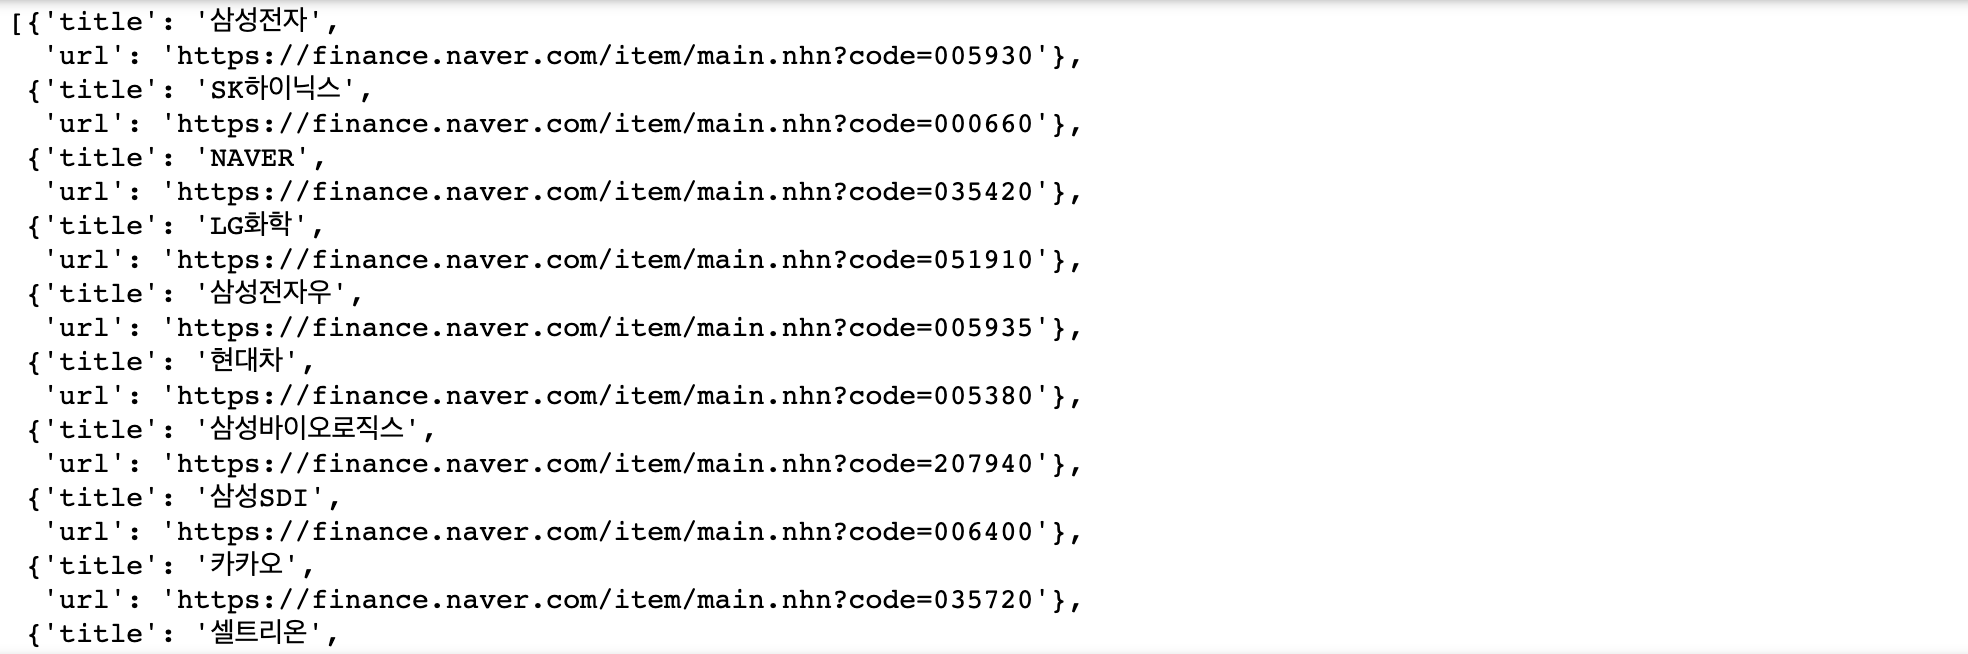

In [ ]:
# finance_list_url에 네이버 증권 url을 저장합니다.
finance_list_url = "https://finance.naver.com/sise/sise_market_sum.nhn?&page=1"

# 위 URL로 접속한다음 그 응답 결과를 가져옵니다. 이를 response라는 이름의 변수에 할당합니다.
response = requests.get(finance_list_url)

# 국내증시 시가총액 페이지에서 기업 리스트를 읽어옵니다.
finance_list = get_finance_list(response.content)

# 이 기업 리스트를 전부 출력합니다.
finance_list

**실습2. get_all_finance_list() 작성**

**Case 1-8** - 실제 네이버 증권 시가총액 전체 페이지를 크롤링하기

약 1500가량의 모드 회사의 기업 이름과, 링크가 잘 가져와지도록 get_all_finance_list()를 구현해보세요.  
(시간이 조금 걸릴 수 있습니다)

In [ ]:
def get_all_finance_list():
    finance_list = []

    return finance_list
    
all_finanace_list = get_all_finance_list()
all_finanace_list

In [ ]:
len(all_finanace_list)

## 2. 기업 상세 정보 수집

## - 주가 정보

- 주가
- 시가
- 시가총액
- 시가총액순위

**실습 3. get_finance_detail() 작성**

In [17]:
def get_finance_detail(html):
    
    return finance

### Unit Tests


**Case 2-1** - 기업정보 페이지에 아무런 내용이 없을 경우

In [18]:
html = """
<div class="rate_info">
</div>
<div class="tab_con1">
</div>
"""

finance = get_finance_detail(html)

assert finance['value'] == None

**Case 2-2** - 기업정보 페이지에서 주가 가져오기

In [19]:
html = """
<div class="rate_info">
    <div class="no_today">
        <div class="blind">
            82,000
        </div>
    </div>
</div>
<div class="tab_con1">
</div>
"""

finance = get_finance_detail(html)

assert finance['value'] == 82000

**Case 2-3** - 기업정보 페이지에서 시가를 추가로 가져오기

`<div class="rate_info">`에서 "시가"라는 단어를 찾고 html 태그간의 부모-자식 관계를 이용하여 찾아보세요.

In [20]:
html = """
<div class="rate_info">
    <div class="no_today">
        <div class="blind">
            82,000
        </div>
    </div>
    <table class="no_info">
        <tr>
            <td class="first">
                <span class="sptxt sp_txt3">시가</span>
                            <em class="no_up">

                    <span class="blind">81,200</span>
                    <span class="no8">8</span>
                    <span class="no1">1</span>
                    <span class="shim">,</span>
                    <span class="no2">2</span>
                    <span class="no0">0</span>
                    <span class="no0">0</span>

                </em>
            </td>
        </tr>
    </table>
</div>
<div class="tab_con1">
</div>
"""

finance = get_finance_detail(html)

assert finance['value'] == 82000

assert finance['open_value'] == 81200

**Case 2-4** - 기업정보 페이지에서 시가총액을 추가로 가져오기

`<div id="tab_con1" class="tab_con1">`에서 "시가총액"이라는 단어를 찾고 html 태그간의 부모-자식 관계를 이용하여 찾아보세요.

In [21]:
html = """
<div class="rate_info">
</div>
<div id="tab_con1" class="tab_con1">
    <div>
        <table>
            <caption>시가총액</caption>
            <tr class="strong">
                <th scope="row">시가총액</th>
                <td><em id="_market_sum">
                            320조
                                5,773
                    </em>억원
                </td>
            </tr>
        </table>
    </div>
</div>
"""

finance = get_finance_detail(html)

assert finance['market_cap(억원)'] == 3205773

**Case 2-5-1** - 기업정보 페이지에서 시가총액순위를 추가로 가져오기

`<div id="tab_con1" class="tab_con1">`에서 "시가총액순위"라는 단어를 찾고 html 태그간의 부모-자식 관계를 이용하여 찾아보세요.

In [22]:
html = """
<div class="rate_info">
</div>
<div id="tab_con1" class="tab_con1">
    <div>
        <table>
            <tr>
                <th scope="row">
                    <a class="link_site" href="/sise/sise_market_sum.nhn">시가총액순위</a>
                </th>
                <td>
                    코스피 <em>1</em>위
                </td>
            </tr>
        </table>
    </div>
</div>
"""

finance = get_finance_detail(html)

assert finance['market_cap_rank'] == '코스피1위'

**Case 2-5-2** - 기업정보 페이지에 시가총액순위가 없는 경우

In [52]:
html = """
<div class="rate_info">
</div>
<div id="tab_con1" class="tab_con1">
    <div>
        <table>
            <tr>
            </tr>
        </table>
    </div>
</div>
"""

finance = get_finance_detail_market(html)

assert finance['market_cap_rank'] == None

**Case 2-6** - 실제 네이버 증권 상세 페이지를 크롤링하기

아래 코드를 실행시켜 다음과 같이 결과가 잘 출력되는지 확인해주세요.  
결과가 잘 출력되지 않는다면 get_finance_detail()를 수정해야 합니다!
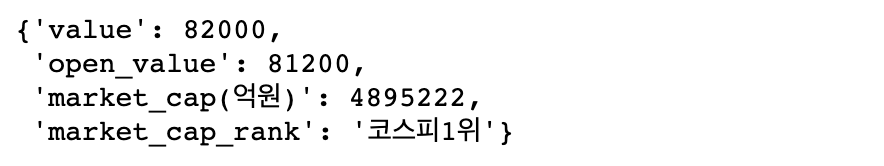

In [23]:
def get_all_finance_detail(response):
    
    finance_detail = get_finance_detail(response.content)
    
    finance = {
        'value' : finance_detail['value'],
        'open_value' : finance_detail['open_value'],
        'market_cap(억원)': finance_detail['market_cap(억원)'],
        'market_cap_rank': finance_detail['market_cap_rank'],
    }

    return finance

In [ ]:
finance_url = "https://finance.naver.com/item/main.nhn?code=005930"

response = requests.get(finance_url)

finance = get_all_finance_detail(response)

finance

### 3. 전체 페이지 읽어오기

**실습 4. 모든 기업리스트에 대한 상세 정보 crawling**  
finance_summary_list 안에 있는 모든 기업 정보를 가져와 finanace_list에 담도록 구현합니다.

In [ ]:
# get_all_finance_list함수를 활용하여 전체페이지에서 기업 요약정보(기업이름, url)를 받아옵니다.
finance_summary_list = get_all_finance_list()
    
finance_list = []

#######################################################
# finance_summary_list 안에 있는 모든 기업 정보를 가져와 finanace_list에 담도록 구현합니다.




#######################################################

finance_list

### 4. CSV로 저장하기

In [ ]:
import pandas as pd

finance_list_df = pd.DataFrame(finance_list)

finance_list_df

In [99]:
finance_list_df.to_csv("finance.csv")